In [8]:
import os
import pandas as pd
from pandas import DataFrame
import networkx as nx
from ei_net import *
import pickle

directory = os.fsencode('../treeoflife/treeoflife.interactomes/treeoflife.interactomes').decode("utf-8")

df = pd.DataFrame(columns=["Species_ID","nodes","edges","ei","determinism","degeneracy"])

for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith(".txt"): 
         G_nx = nx.read_edgelist(os.path.join(directory,filename))
         df = df.append({
             "Species_ID": os.path.splitext(filename)[0],
             "nodes": G_nx.number_of_nodes(),
             "edges": G_nx.number_of_edges(),
             "ei": effective_information(G_nx),
             "determinism": determinism(G_nx),
             "degeneracy": degeneracy(G_nx)
         }, ignore_index=True)
         #print(os.path.join(directory, filename))
         continue
     else:
         continue
            
with open('species_ei.pkl', 'wb') as f:
    pickle.dump(df, f)

MemoryError: 

In [48]:
import pickle

with open('species_ei.pkl', 'rb') as f:
    df = pickle.load(f)
df.head()
df.shape

(1840, 6)

In [66]:
df6 = DataFrame.from_csv("../treeoflife/species_evolution_bdm_resilience.csv")
df6.Species_ID = df6.Species_ID.astype(str)
df7 = pd.merge(df6,df,on="Species_ID")
df7.head()
df7.shape

/home/dll/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


(104, 21)

In [79]:
df4 = DataFrame.from_csv("../treeoflife/species_evolution_bdm.csv")
df4.Species_ID = df4.Species_ID.astype(str)
df8 = pd.merge(df4,df,on="Species_ID")
df8.head()
df8.shape

/home/dll/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


(1306, 15)

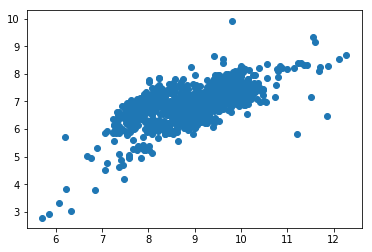

In [89]:
plt.scatter(np.log(df8.bdm),df8.ei)

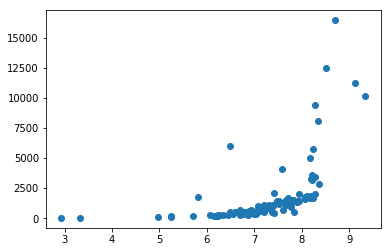

In [100]:
plt.scatter(df7.ei,df7.nodes)

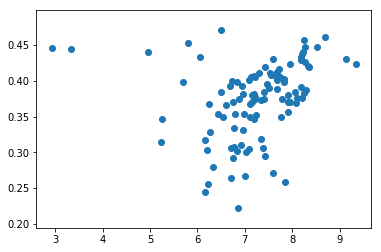

In [86]:
plt.scatter(df7.ei,df7.resilience)

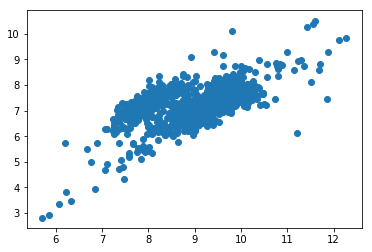

In [58]:
plt.scatter(np.log(df8.bdm),df8.determinism)

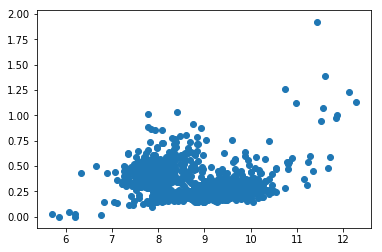

In [59]:
plt.scatter(np.log(df8.bdm),df8.degeneracy)

In [68]:
df8.to_csv(r'species_evolution_bdm_resilience_ei.csv')

In [95]:
df7.sort_values(by=['nodes'],ascending=True)

,Species_ID,nodes_x,edges_x,bdm,ent,Evolution,Domain,Taxonomy_level2,Compact_name,Official_NCBI_name,...,group,pub count,nodes_y,edges_y,resilience,nodes,edges,ei,determinism,degeneracy
68,148305,26,68,350.585093,2.947703,3.742229,Eukaryota,Eukaryota_Opisthokonta,Magnaporthe grisea,Magnaporthe grisea,...,Opisthokonta,"1,192",26,68,0.446,26,68,2.935784,2.935784,1.848131e-16
78,33178,45,138,435.651998,1.889664,3.738855,Eukaryota,Eukaryota_Opisthokonta,Aspergillus terreus,Aspergillus terreus,...,Opisthokonta,"1,396",45,138,0.444,45,138,3.324847,3.364693,3.984575e-02
36,39946,105,224,862.674663,0.948166,3.692920,Eukaryota,Eukaryota_Viridiplantae,Oryza sativa Indica,Oryza sativa Indica Group,...,Viridiplantae,"1,597",105,224,0.441,105,224,4.962064,4.979857,1.779229e-02
8,722438,131,275,2325.178371,1.553712,3.403909,Bacteria,Bacteria_Terrabacteria group,Mycoplasma pneumoniae,Mycoplasma pneumoniae FH,...,Terrabacteria group,"2,805",131,275,0.347,131,275,5.246882,5.399356,1.524741e-01
1,743965,149,366,2792.164950,1.756050,3.403909,Bacteria,Bacteria_Terrabacteria group,Mycoplasma putrefaciens,Mycoplasma putrefaciens KS1,...,Terrabacteria group,"15,477",149,366,0.315,149,366,5.241630,5.386014,1.443845e-01
59,457396,182,176,1836.690647,0.792169,2.703029,Bacteria,Bacteria_Terrabacteria group,Clostridium sp. 7243FAA,Clostridium sp. 7_2_43FAA,...,Terrabacteria group,"1,247",182,176,0.255,182,176,6.232557,6.822236,5.896795e-01
75,290434,186,408,2632.991146,1.315398,2.719618,Bacteria,Bacteria_Spirochaetes,Borrelia garinii,Borrelia garinii PBi,...,Spirochaetes,"6,808",186,408,0.399,186,408,5.704413,5.906503,2.020903e-01
71,904294,192,203,2172.806297,0.920455,3.347977,Bacteria,Bacteria_Terrabacteria group,Streptococcus sp. F0418,Streptococcus sp. oral taxon 056 str. F0418,...,Terrabacteria group,"99,893",192,203,0.303,192,203,6.211592,6.756615,5.450229e-01
21,283166,208,318,2164.801121,0.890574,2.695128,Bacteria,Bacteria_Proteobacteria,Bartonella henselae,Bartonella henselae str. Houston-1,...,Proteobacteria,"1,231",208,318,0.245,208,318,6.160729,6.528493,3.677640e-01
60,272561,224,443,3410.494910,1.164319,2.604090,Bacteria,Bacteria_PVC group,Chlamydia trachomatis,Chlamydia trachomatis D/UW-3/CX,...,PVC group,"11,229",224,443,0.317,224,443,6.164282,6.316291,1.520090e-01
